<img
    src="https://upload.wikimedia.org/wikipedia/commons/4/42/CNAM_Logo.svg" 
    alt=""
    height="200px" 
    width="200px"
    align=left
/> 

<center> <br>
  <h1 style="color:#7c7979";></h1>
</center>  

<center>
  <h1 style="color:#000000";>L'algorithme des $k$-moyennes avec Scikit Learn en Python</h1>
</center>  

*Notebook repris du [GK Bionic Tutorial](https://nbviewer.jupyter.org/github/temporaer/tutorial_ml_gkbionics/blob/master/2%20-%20KMeans.ipynb) (Universität Bonn)*

In [30]:
import matplotlib.pyplot as plt
import numpy as np
import sklearn.datasets as datasets
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

Commençons par générer des données aléatoirement :

In [31]:
X, Y = datasets.make_blobs(centers=4, cluster_std=0.5, random_state=0)

On trace les données afin d'avoir un aperçu de ce que l'on manipule :

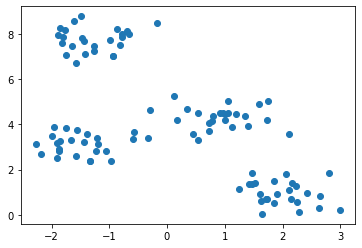

In [32]:
plt.jet() # set the color map. When your colors are lost, re-run this.
plt.scatter(X[:,0], X[:,1])
plt.show()

Les données semblent contenir 4 différents "types" de points.  
Cela correspond en réalité à la façon dont ils ont été générés.  
On peut représenter graphiquement cette information en utilisant des couleurs et en se basant sur l'information en $Y$.

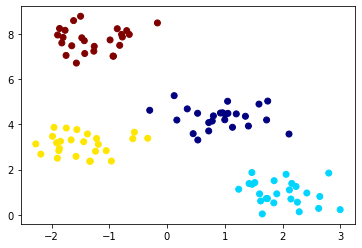

In [33]:
plt.scatter(X[:,0], X[:,1], c=Y)
plt.show()

Normalement, on ne peut pas connaître l'information en $Y$, cependant, on peut tenter de la retrouver à partir des données seules.   
C'est ce que fait l'algorithme des $k$-moyennes, disponible à partir de la librairie `scikit learn`.

In [34]:
from sklearn.cluster import KMeans
kmeans = KMeans(4, random_state=8)
Y_hat = kmeans.fit(X).labels_

Maintenant les attributions de labels doivent être assez similaires à $Y$, avec éventuellement un ré-agencement des couleurs.

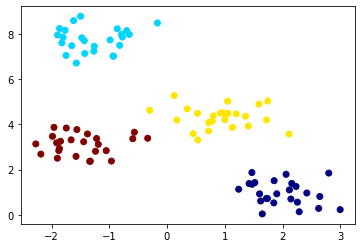

In [35]:
plt.scatter(X[:,0], X[:,1], c=Y_hat)
plt.show()

Mais bien souvent on ne souhaite pas faire l'attribution des couleurs des points par rapport à leur moyenne mais on souhaite avoir l'information sur les moyennes $\mu$ elles-mêmes.   
Les moyennes en $\mu$ sont représentatives de leurs clusters respectifs.

[[ 1.99186903  0.96561071]
 [-1.26811733  7.76378266]
 [ 0.92578447  4.32475792]
 [-1.47935679  3.11716896]]


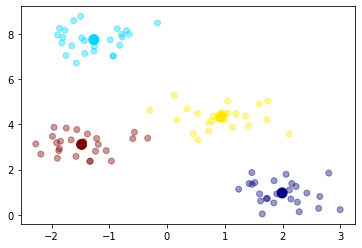

In [12]:
plt.scatter(X[:,0], X[:,1], c=Y_hat, alpha=0.4)
mu = kmeans.cluster_centers_
plt.scatter(mu[:,0], mu[:,1], s=100, c=np.unique(Y_hat))
print(mu)

## $k$-moyennes sur des images

Dans ce deuxième exemple, on utilise l'algorithme des $k$-moyennes sur le jeu données classique `MNIST` de la librairie `scikit learn`.    
Le jeu de données `MNIST` contient des milliers d'images de numéros écrits à la main.    
Commençons par charger cette base de données d'images (cela peut prendre plusieurs secondes, notez l'astérisque à gauche de votre cellule [*]).

In [18]:
from sklearn.datasets import fetch_openml
X_digits, Y_digits = fetch_openml('mnist_784', version=1, return_X_y=True)
X_digits, Y_digits = shuffle(X_digits,Y_digits) # shuffle dataset (which is ordered!)
X_digits = X_digits[-5000:]       # take only the last instances, to shorten runtime of KMeans

Regardons quelques instances du jeu de données que nous venons de charger (cela peut prendre plusieurs secondes) :

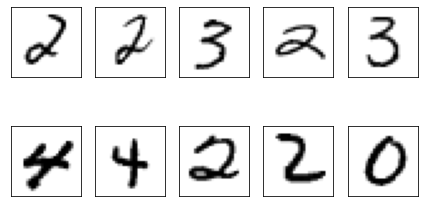

In [20]:
plt.rc("image", cmap="binary") # use black/white palette for plotting
for i in range(10):
    plt.subplot(2,5,i+1)
    plt.imshow(X_digits[i].reshape(28,28))
    plt.xticks(())
    plt.yticks(())
plt.tight_layout()

Regardons maintenant de plus près les moyennes. Bien qu'il y ait 10 numéros distincts, certains d'entre eux sont sur/sous représentés. Pourquoi ?

In [21]:
kmeans = KMeans(20)
mu_digits = kmeans.fit(X_digits).cluster_centers_

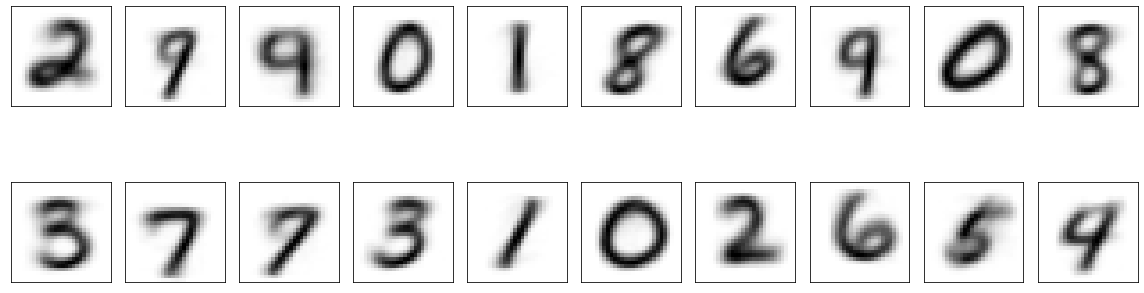

In [26]:
plt.figure(figsize=(16,6))
for i in range(int(2*(mu_digits.shape[0]/2))): # loop over all means
    plt.subplot(2,mu_digits.shape[0]/2,i+1)
    plt.imshow(mu_digits[i].reshape(28,28))
    plt.xticks(())
    plt.yticks(())
plt.tight_layout()